In [1]:
#Uses LSTM (artificial recurrent neural network) to predict closing stock price 
#of corporations using the past 60 days

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

In [3]:
#Get stock quote
# web.DataReader()
df = web.DataReader('ETH-USD',data_source='yahoo', start = '2015-08-06', end = datetime.date.today())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860
...,...,...,...,...,...,...
2021-04-18,2276.776855,2086.688721,2238.032715,2166.188721,3.406065e+10,2166.188721
2021-04-19,2345.834961,2060.143799,2161.939453,2330.210938,3.943348e+10,2330.210938
2021-04-20,2467.200684,2238.366943,2331.160156,2364.751709,3.889907e+10,2364.751709


/Applications/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


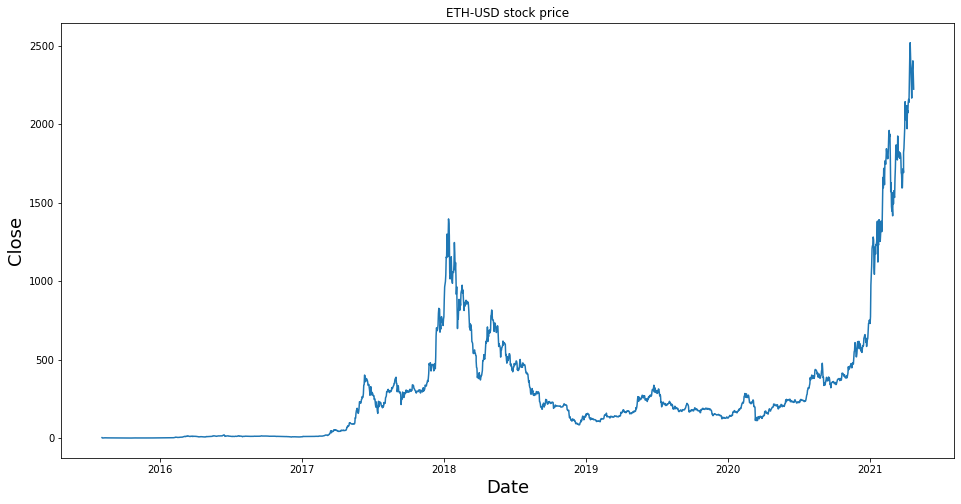

In [4]:
plt.figure(figsize=(16,8))
plt.title('ETH-USD stock price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
type(data)
#Turn data into numpy array
dataset = data.values
#train data model (find the length)
training_data_len = math.ceil(len(dataset)*0.8)
#training_data_len

In [6]:
training_data_len

1667

In [7]:
#Create the training data set
#Create the scaled training data sett
train_data = dataset[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

#Taking the past 60 days to train the model
for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 62:
     print(x_train)
     print(y_train)

[array([2.77212   , 0.75332499, 0.70189703, 0.70844799, 1.06786001,
       1.21744001, 1.82766998, 1.82787001, 1.68889999, 1.56603003,
       1.20360994, 1.08704996, 1.25885999, 1.46492004, 1.39529002,
       1.37923002, 1.35258996, 1.23126996, 1.14019001, 1.15998006,
       1.14769995, 1.19138002, 1.18254995, 1.31927001, 1.35824001,
       1.35160995, 1.29479003, 1.26493001, 1.27441001, 1.33880997,
       1.29583001, 1.24664998, 1.24242997, 1.20650995, 1.16577005,
       0.98297799, 1.03874004, 0.93600303, 0.87562197, 0.94441003,
       0.907175  , 0.87423098, 0.85368502, 0.88239098, 0.93844497,
       0.919047  , 0.90179598, 0.89340597, 0.81361002, 0.73622298,
       0.78596401, 0.72083902, 0.58288598, 0.66114599, 0.738644  ,
       0.69021499, 0.67857403, 0.68717098, 0.66837901, 0.62864298])]
[0.6506450176239014]
[array([2.77212   , 0.75332499, 0.70189703, 0.70844799, 1.06786001,
       1.21744001, 1.82766998, 1.82787001, 1.68889999, 1.56603003,
       1.20360994, 1.08704996, 1.2588

In [8]:
#Convert x and y _ train sets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape data - lstm excepts 3D in form [samples, time steps, number of features] x_train & y_train are 2D right now
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1607, 60, 1)

In [12]:
x_train

array([[[  2.77212   ],
        [  0.75332499],
        [  0.70189703],
        ...,
        [  0.68717098],
        [  0.66837901],
        [  0.62864298]],

       [[  0.75332499],
        [  0.70189703],
        [  0.70844799],
        ...,
        [  0.66837901],
        [  0.62864298],
        [  0.65064502]],

       [[  0.70189703],
        [  0.70844799],
        [  1.06786001],
        ...,
        [  0.62864298],
        [  0.65064502],
        [  0.60938799]],

       ...,

       [[128.32270813],
        [134.75798035],
        [132.63348389],
        ...,
        [273.75415039],
        [265.21643066],
        [247.81759644]],

       [[134.75798035],
        [132.63348389],
        [129.6108551 ],
        ...,
        [265.21643066],
        [247.81759644],
        [225.68026733]],

       [[132.63348389],
        [129.6108551 ],
        [130.80200195],
        ...,
        [247.81759644],
        [225.68026733],
        [226.75338745]]])

In [13]:
#Scale the data (normalisation)
scaler = StandardScaler() #try standardscaler
scaled_data = scaler.fit_transform(dataset)

In [14]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
#Compile model
model.compile(optimizer='adam',loss='mean_squared_error') #test rmse

In [16]:
#train model
model.fit(x_train,y_train, batch_size=1,epochs=1)

1607/1607 [==============================] - 51s 30ms/step - loss: 59743.6361


In [17]:
#Create testing data set
#Create new array containing scaled values from 1524 to 1980
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test & y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
#Convert data to a numpyarray
x_test = np.array(x_test)

In [19]:
#Reshape data to 3D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [20]:
#Get model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
#Get the root mean squared error (RMSE) - sd of the residuals
rmse = np.sqrt(np.mean(predictions-y_test)**2)
# rmse value of 0 = predictions were exact, 60 = max error (depends on the number of layers you have - 60 days = 60 data points)
rmse

60228.801242021415

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


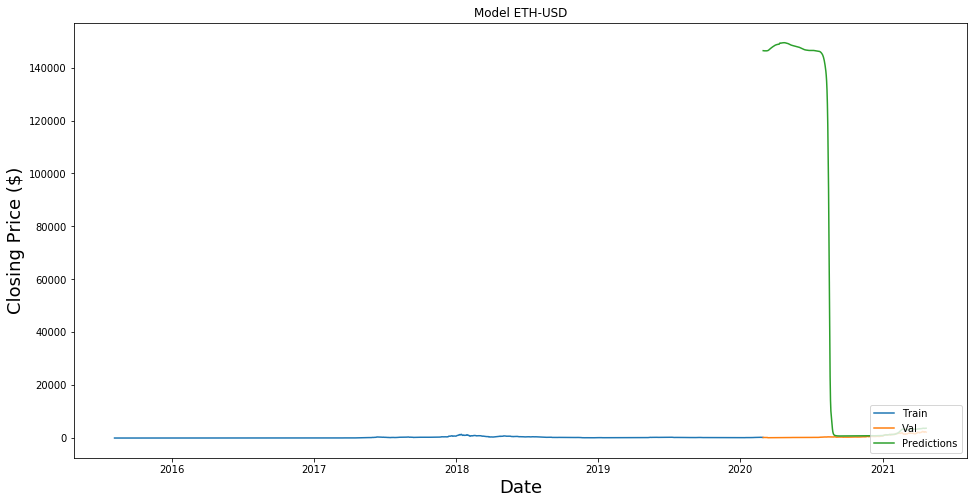

In [22]:
#plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise model
plt.figure(figsize = (16,8))
plt.title('Model ETH-USD')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closing Price ($)',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [23]:
#Show valid price & Predicted prices
valid

,Close,Predictions
Date,,
2020-02-29,219.848511,146410.562500
2020-03-01,218.970596,146379.515625
2020-03-02,230.569778,146362.250000
2020-03-03,224.479630,146349.703125
2020-03-04,224.517975,146344.531250
...,...,...
2021-04-18,2166.188721,3670.888428
2021-04-19,2330.210938,3646.620605
2021-04-20,2364.751709,3674.629883


In [24]:
#Get the quote
Eth_quote = web.DataReader('ETH-USD',data_source = 'yahoo', start = '2012-01-01', end = '2021-01-09')
#Create a new dataframe
new_df = Eth_quote.filter(['Close'])
#Get the last 60 days clsoing price values and convert dataframe to an array
last_60_days = new_df[-60:].values
#Scale data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test dataset into an array
X_test= np.array(X_test)
#Reshape to 3D to use for LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1222.7197]]


In [25]:
Eth_quote2 = web.DataReader('ETH-USD',data_source = 'yahoo', start = '2015-08-06', end = '2021-01-10')
print(Eth_quote2['Close'])

Date
2015-08-06       2.772120
2015-08-07       0.753325
2015-08-08       0.701897
2015-08-09       0.708448
2015-08-10       1.067860
                 ...     
2021-01-06    1207.112183
2021-01-07    1225.678101
2021-01-08    1224.197144
2021-01-09    1281.077271
2021-01-10    1262.246704
Name: Close, Length: 1980, dtype: float64
